# Random forests - removing features

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [79]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1)
y2015.head()

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [80]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

# Observe new dataframe.
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60 months,14.85,379.39,C,10+ years,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36 months,7.49,298.58,A,8 years,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,10+ years,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,10+ years,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,36 months,19.89,320.99,E,8 years,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [81]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop(['loan_status', 'id', 'member_id'], 1)
X = pd.get_dummies(X)
X = X.dropna(axis=1)
y = y2015['loan_status']

cross_val_score(rfc, X, y, cv=10, n_jobs=4)

array([0.98076512, 0.98021895, 0.98162   , 0.98180998, 0.97361672,
       0.97751128, 0.97098008, 0.98055048, 0.97964709, 0.98069159])

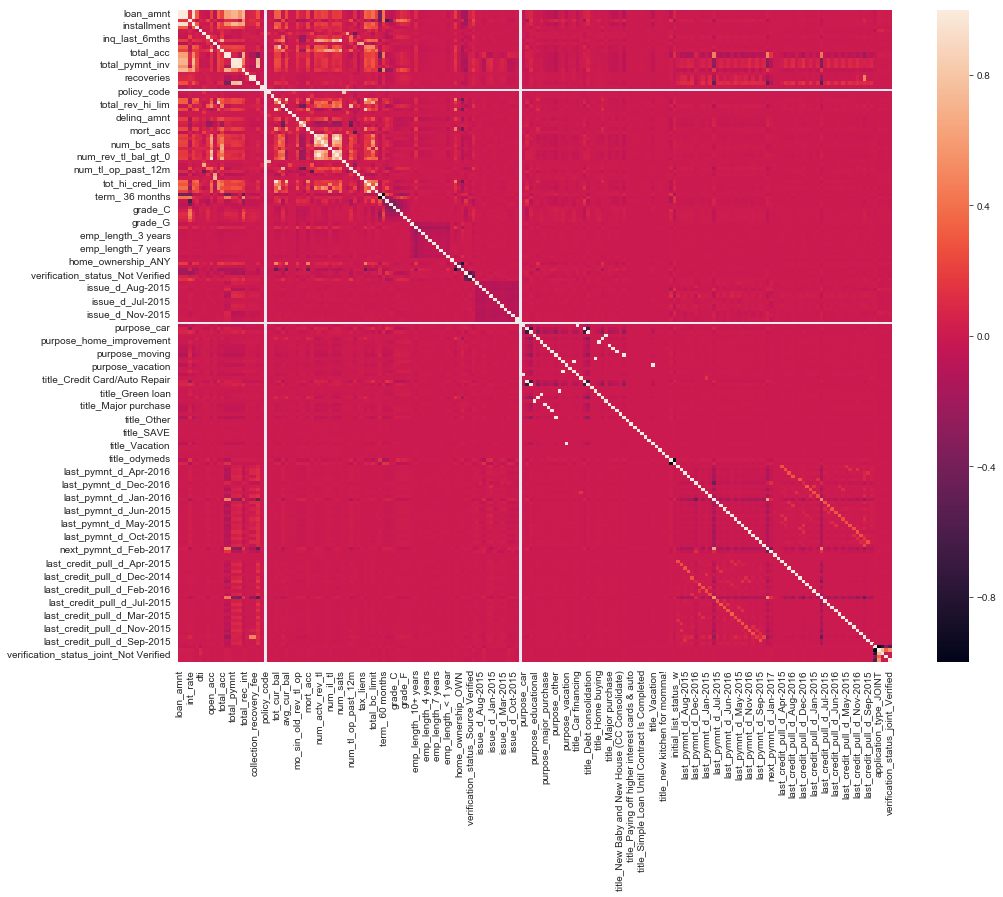

In [82]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(X.corr(), ax=ax)

#### Notes: Correlation heatmap

We can see some nice shades here as the majority of the colors sit around the red values, indicating no correlation.

## DRILL Instructions: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [83]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

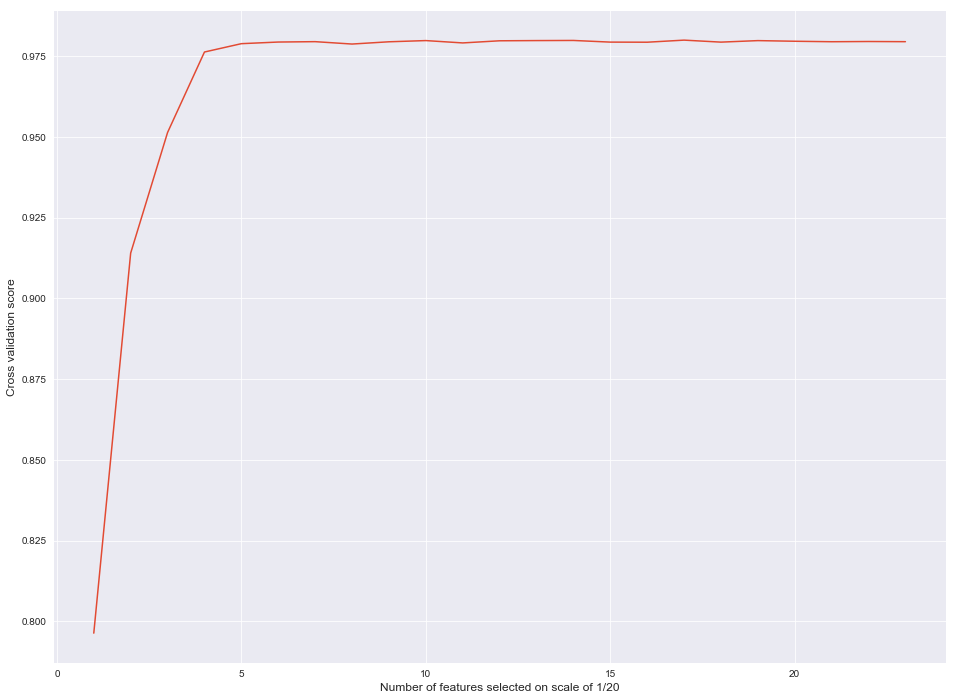

In [84]:
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=rfc, step=.05, cv=KFold(3),
              scoring='accuracy', n_jobs=4)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores: borrowed from sklearn site
plt.figure(figsize=(16,12))
plt.xlabel("Number of features selected on scale of 1/20")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Notes: Features selected number

We can probably pick values around 60-70 features (the fraction of all features) and still have stellar performance. To hit around the 90 percent score mark, we can probably go as low as 25 or 30.

In [85]:
rfc_clf = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=4)
rfc_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

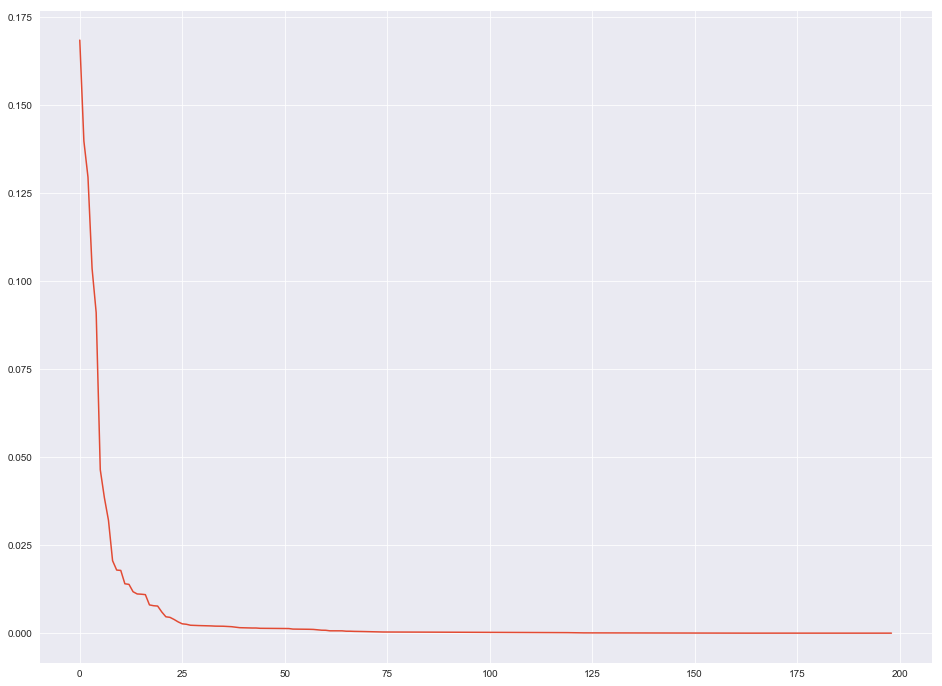

In [86]:
import operator

keys_scores = {}
for key, score in zip(X.keys(), rfc_clf.feature_importances_):
    keys_scores[key] = score
    
sorted_ks = sorted(keys_scores.items(), key=operator.itemgetter(1), reverse=True)
scores_list = [list(sorted_ks[i])[1] for i in range(len(sorted_ks))]

plt.figure(figsize=(16,12))
plt.plot(scores_list)

In [87]:
# Feature names and feature_importances_
sorted_ks[:10]

[('out_prncp_inv', 0.1683831905834453),
 ('last_pymnt_amnt', 0.1397303152443052),
 ('out_prncp', 0.1294844801079323),
 ('next_pymnt_d_Feb-2017', 0.10354630809176786),
 ('last_pymnt_d_Jan-2017', 0.0909989192127218),
 ('total_rec_prncp', 0.04639885041393145),
 ('total_pymnt', 0.038473869170632884),
 ('last_credit_pull_d_Jan-2017', 0.032027144685995663),
 ('total_pymnt_inv', 0.020577387607242772),
 ('collection_recovery_fee', 0.01791070042903019)]

#### Notes: Principle and payment data

When pulling the feature importances method, we can literally see which are most significant. Removing principles or payment features would remove more than 50 percent of our variance and render the model weak. I can not see how the model would be efficient without them. 

In [88]:
rfc_new = ensemble.RandomForestClassifier(n_estimators=10, max_features=70, n_jobs=4)
cross_val_score(rfc_new, X, y, cv=10)

array([0.97646696, 0.97972026, 0.97938781, 0.98159626, 0.93766326,
       0.96143434, 0.95392909, 0.98052673, 0.9794571 , 0.98107158])

#### Notes: 70 features

As evidenced by the graphs above, we can observe that scores are still quite strong with more than half of the features removed.

In [89]:
rfc_new = ensemble.RandomForestClassifier(n_estimators=10, max_features=25, n_jobs=4)
cross_val_score(rfc_new, X, y, cv=10)

array([0.97960153, 0.98036143, 0.98197621, 0.98188122, 0.95772976,
       0.97409166, 0.96333325, 0.98069296, 0.98019332, 0.98107158])

#### Notes: 25 features

Even with *only* 25 features, we are still hitting strong marks. The weakest score here is barely below 96.

Computation times are quite high, but the model performs exceptionally well with only a fraction of the data.